In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

### ****Task1 : Merging 12 months of sales data into a single csv file****

###### os.listdir() will get you everything that's in a directory - files and directories.

If you want just files, you could either filter this down using os.path:

from os import listdir

from os.path import isfile, join

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [37]:
df=pd.read_csv("../input/sales-datasets/Sales_April_2019.csv")
files = [file for file in os.listdir("../input/sales-datasets")] # listing all the files of a directory.
for f in files: # printing each file from listed files.
    print(f)

Sales_August_2019.csv
Sales_May_2019.csv
Sales_February_2019.csv
Sales_November_2019.csv
Sales_January_2019.csv
Sales_March_2019.csv
Sales_September_2019.csv
Sales_April_2019.csv
Sales_July_2019.csv
Sales_October_2019.csv
Sales_June_2019.csv
Sales_December_2019.csv


In [38]:
all_months_data=pd.DataFrame() # making it data frame.
for file in files:
    df=pd.read_csv("../input/sales-datasets/"+file) # accessing each dataset from directory
    all_months_data=pd.concat([all_months_data,df]) # concating df(current dataset) with al_months_data.
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [39]:
all_months_data.to_csv("all_data.csv",index=False) # saved the concatenated datasets to a single csv data.

### **Reading the updated dataframe**

In [40]:
data=pd.read_csv("all_data.csv")
data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
5,236675,Wired Headphones,1,11.99,08/02/19 23:54,"470 Hill St, San Francisco, CA 94016"
6,236676,34in Ultrawide Monitor,1,379.99,08/04/19 19:52,"470 Cherry St, Los Angeles, CA 90001"
7,236677,20in Monitor,1,109.99,08/13/19 07:16,"918 6th St, San Francisco, CA 94016"
8,236678,Wired Headphones,1,11.99,08/25/19 20:11,"58 9th St, San Francisco, CA 94016"
9,236679,Macbook Pro Laptop,1,1700.0,08/07/19 15:43,"239 Spruce St, Los Angeles, CA 90001"


In [41]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

## Clean up the data

In [42]:
data.tail(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186840,319661,AAA Batteries (4-pack),1,2.99,12/11/19 21:24,"691 West St, Portland, ME 04101"
186841,319662,Bose SoundSport Headphones,1,99.99,12/31/19 19:07,"939 8th St, San Francisco, CA 94016"
186842,319663,Flatscreen TV,1,300,12/07/19 08:25,"334 12th St, Atlanta, GA 30301"
186843,319664,ThinkPad Laptop,1,999.99,12/30/19 01:06,"767 2nd St, San Francisco, CA 94016"
186844,319665,iPhone,1,700,12/15/19 11:13,"377 1st St, Atlanta, GA 30301"
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
186849,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001"


### Get all the NaNs from the data frame "data"

In [43]:
nan_df=data.isnull() # if true then it is Nan or null value.
nan_df.head() # but we cant see any True or null value,so we will fetch all the NaN from the DataFrame "Data".

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


#### Using isna() to select all rows with NaN under an entire DataFrame:

df[df.isna().any(axis=1)]

In [44]:
nan_df= data[data.isna().any(axis="columns")]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
312,NaN,NaN,NaN,NaN,NaN,NaN
1222,NaN,NaN,NaN,NaN,NaN,NaN
2648,NaN,NaN,NaN,NaN,NaN,NaN
2685,NaN,NaN,NaN,NaN,NaN,NaN
3119,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Dropping all NaN
data = data.dropna(how="all")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


## **Augment data with additional columns**

### Task 2 : Add month column

In [46]:
# Adding a column with the "order date" first two values.
data["month"] = data["Order Date"].str[0:2] # getting "Or" when slicing and because of that not able to convert str to int.
data['month'] = data['month'].astype('int32')
data.head()

ValueError: invalid literal for int() with base 10: 'Or'

### **Find "Or" and delete it.**

In [47]:
temp_df = data[data["Order Date"].str[0:2] == "Or"] # we get the values with "Or" in order date column.
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
211,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
243,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1291,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1412,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1427,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [48]:
data = data[data["Order Date"].str[0:2] != "Or"] # To filter out "Or" from Order Date.
data.head() #replace temp_df.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08


#### Again adding the month column to the data frame without any NaN / "Or"

In [49]:
data["month"] = data["Order Date"].str[0:2]
data['month'] = pd.to_numeric(data["month"]) # converting it to numeric.
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8


In [50]:
data.dtypes # checking the data types and hence month column is created and converted to int.

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int64
dtype: object

### Task 3 : Add a sales column by multiplying "Quantity Ordered" and "Price Each"

In [51]:
data["Quantity Ordered"] = data["Quantity Ordered"].astype("int")
data["Price Each"] = data["Price Each"].astype("float")
data["sales"] = data["Quantity Ordered"] * data["Price Each"] # convert it to float and int to multiply as strings can't be multiplied.
data.head() # we have added a sales column successfully.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


In [52]:
data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 int64
sales               float64
dtype: object

# Data Exploration

### **Question 1: What was the best month for sales? How much was earned that month?**

In [53]:
df1=data.groupby("month").sum()
df1

,Quantity Ordered,Price Each,sales
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [54]:
df1["sales"].max() # 12th month was the best month for sales with the highest sales with 4.613443e+06 earning.

4613443.34000153

In [55]:
df1["sales"].min() # january was the worst month for sales with 1822256.729999914 earning.

1822256.7299999131

### **Visualizing the first answer**

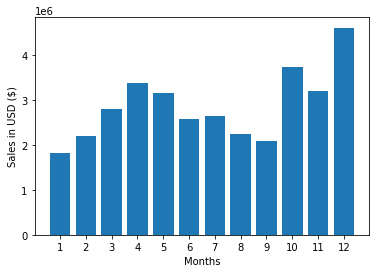

In [56]:
months = df1.index # Or use "range(1,13)".
plt.xlabel("Months")
plt.ylabel("Sales in USD ($)")
plt.bar(months,df1["sales"])
plt.xticks(months)
plt.show()

### **Question 2 : Which city has the heighest number of sales?**

#### **Augment/Add the data frame with the "city" column.**

In [57]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


In [58]:
def get_city(address):
    return address.split(",")[1] # splitting by comma and fetching [1] position : ["136 Church St", "New York City", "NY 10001"]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

data["city"] = data["Purchase Address"].apply(lambda x : get_city(x) + " "+ get_state(x)) # creating a city column.
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle WA
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas TX
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland OR
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles CA
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City NY


In [59]:
df2 = data.groupby("city").sum()
df2

,Quantity Ordered,Price Each,month,sales
city,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


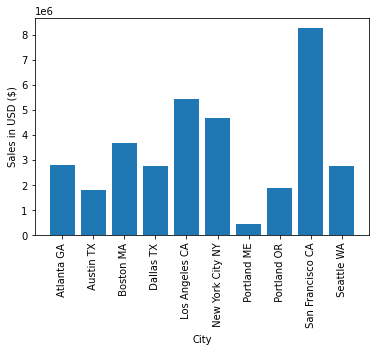

In [60]:
cities = df2.index
plt.xlabel("City")
plt.ylabel("Sales in USD ($)")
plt.bar(cities,df2["sales"])
plt.xticks(cities,rotation="vertical")
plt.show()

### Question 3 : What time should we display advertisements to maximize the likelihood of customer's buying product?

In [61]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle WA
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas TX
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland OR
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles CA
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City NY


In [63]:
data.dtypes # dtype of order date is an object so we will change the type of order date.

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 int64
sales               float64
city                 object
dtype: object

In [68]:
data["Order Date"] = pd.to_datetime(data["Order Date"])
data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
month                        int64
sales                      float64
city                        object
dtype: object

In [70]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle WA
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas TX
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,Portland OR
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles CA
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,New York City NY


In [75]:
# create an "Hour" column
data["Hour"] = data["Order Date"].dt.hour # dt is date and hour is to grab the hour.
data["Minute"] = data["Order Date"].dt.minute
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,Minute
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle WA,22,21
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas TX,15,11
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,Portland OR,14,40
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles CA,20,59
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,New York City NY,19,53


In [89]:
df3 = data.groupby("Hour").count()
df3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854


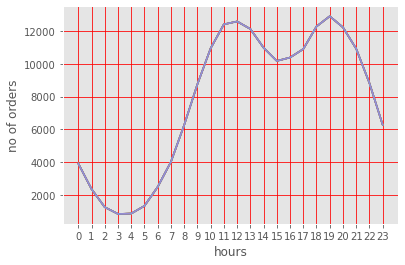

In [102]:
hours=df3.index
plt.xlabel("hours")
plt.ylabel("no of orders")
plt.plot(hours,df3)
plt.xticks(hours)
plt.grid(color="r")
plt.show()

### Question 4 : What product are often sold together?

In [103]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,Minute
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle WA,22,21
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas TX,15,11
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,Portland OR,14,40
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles CA,20,59
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,New York City NY,19,53


In [108]:
df5= data[data["Order ID"].duplicated(keep=False)] #keep{‘first’, ‘last’, False}, default ‘first’

df5.head(20)                                               #Determines which duplicates (if any) to mark.

                                        #first : Mark duplicates as True except for the first occurrence.

                                        #last : Mark duplicates as True except for the last occurrence.

                                        #False : Mark all duplicates as True.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,Minute
46,236716,AA Batteries (4-pack),2,3.84,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,7.68,San Francisco CA,20,12
47,236716,USB-C Charging Cable,1,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,11.95,San Francisco CA,20,12
60,236729,iPhone,1,700.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,700.00,San Francisco CA,9,28
61,236729,Apple Airpods Headphones,1,150.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,150.00,San Francisco CA,9,28
62,236730,Google Phone,1,600.00,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",8,600.00,New York City NY,10,17
63,236730,Wired Headphones,1,11.99,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",8,11.99,New York City NY,10,17
132,236799,Google Phone,1,600.00,2019-08-01 12:38:00,"309 2nd St, San Francisco, CA 94016",8,600.00,San Francisco CA,12,38
133,236799,Wired Headphones,1,11.99,2019-08-01 12:38:00,"309 2nd St, San Francisco, CA 94016",8,11.99,San Francisco CA,12,38
163,236829,Vareebadd Phone,1,400.00,2019-08-16 08:51:00,"27 2nd St, Los Angeles, CA 90001",8,400.00,Los Angeles CA,8,51
164,236829,USB-C Charging Cable,1,11.95,2019-08-16 08:51:00,"27 2nd St, Los Angeles, CA 90001",8,11.95,Los Angeles CA,8,51


In [111]:
df5["Grouped"] = df5.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))
df5.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,Minute,Grouped
46,236716,AA Batteries (4-pack),2,3.84,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,7.68,San Francisco CA,20,12,"AA Batteries (4-pack),USB-C Charging Cable"
47,236716,USB-C Charging Cable,1,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,11.95,San Francisco CA,20,12,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,iPhone,1,700.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,700.00,San Francisco CA,9,28,"iPhone,Apple Airpods Headphones"
61,236729,Apple Airpods Headphones,1,150.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,150.00,San Francisco CA,9,28,"iPhone,Apple Airpods Headphones"
62,236730,Google Phone,1,600.00,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",8,600.00,New York City NY,10,17,"Google Phone,Wired Headphones"


In [114]:
# as products and order id is printing multiple times so we need to drop the duplicates.
df5 = df5[["Order ID","Grouped"]].drop_duplicates()
df5.head(50)

,Order ID,Grouped
46,236716,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,"iPhone,Apple Airpods Headphones"
62,236730,"Google Phone,Wired Headphones"
132,236799,"Google Phone,Wired Headphones"
163,236829,"Vareebadd Phone,USB-C Charging Cable"
221,236885,"27in 4K Gaming Monitor,USB-C Charging Cable"
331,236992,"Google Phone,USB-C Charging Cable"
353,237013,"iPhone,Lightning Charging Cable"
386,237045,"Bose SoundSport Headphones,Wired Headphones"
405,237063,"LG Dryer,AA Batteries (4-pack)"


In [115]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

### Question 5 : What products sold the most?What do you think it sold the most?

In [116]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,Minute
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle WA,22,21
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas TX,15,11
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,Portland OR,14,40
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles CA,20,59
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,New York City NY,19,53


In [120]:
df6 = data.groupby("Product").sum()
df6.head()

,Quantity Ordered,Price Each,month,sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039


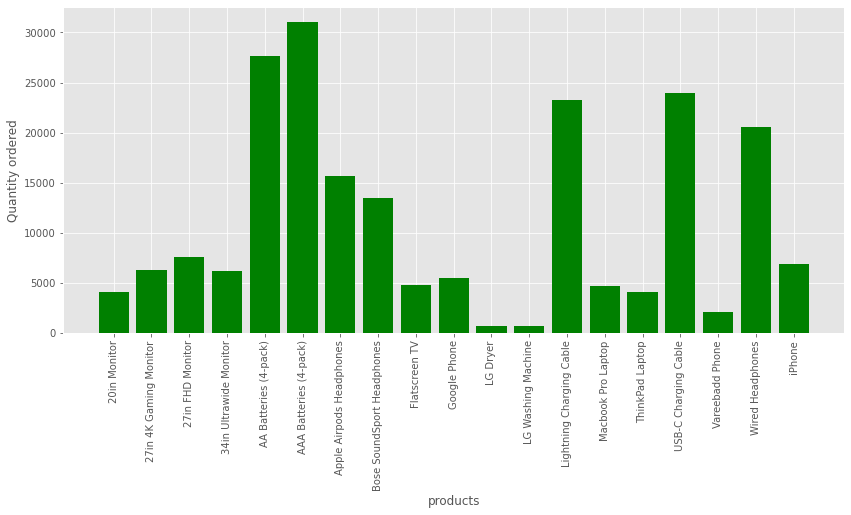

In [132]:
quantity_ordered = df6["Quantity Ordered"]
products_ordered = df6.index
plt.figure(figsize=(14,6))
plt.xlabel("products")
plt.ylabel("Quantity ordered")
plt.bar(products_ordered,quantity_ordered,color="g")
plt.xticks(products_ordered,rotation = "vertical")
plt.show()

In [135]:
# get the average of the price of the products and overlap the mean result so that we could know that 
# what's the reason that AAA Batries are sold maximum.
prices = data.groupby("Product")["Price Each"].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

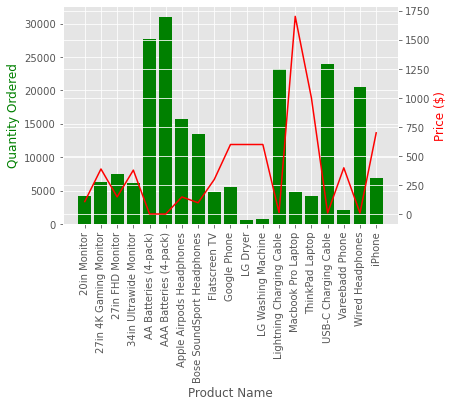

In [146]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products_ordered,quantity_ordered,color="g")
ax2.plot(products_ordered, prices, color='r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(products_ordered,rotation='vertical',size=10)
plt.show()

In [ ]:
# price of AAA Bateries are less so it is sold most.